# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fifab\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
load_dotenv()

True

In [6]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [7]:
type(api_key)

str

In [10]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [11]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
bitcoin_news

{'status': 'ok',
 'totalResults': 8311,
 'articles': [{'source': {'id': None, 'name': 'Lifehacker.com'},
   'author': 'Jeff Somers',
   'title': 'Is the Crypto Bubble Going to Burst?',
   'description': 'Even if you aren’t paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 trillion last year to about $1.5 trillion in a matter of days…',
   'url': 'https://lifehacker.com/is-the-crypto-bubble-going-to-burst-1848475768',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/976a59b09e0e681e692bd7517498e3f2.jpg',
   'publishedAt': '2022-02-09T16:00:00Z',
   'content': 'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]'},
  {'sou

In [12]:
# Fetch the Ethereum news articles
ether_news = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")
ether_news

{'status': 'ok',
 'totalResults': 3763,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Corin Faife',
   'title': 'Crypto.com admits over $30 million stolen by hackers',
   'description': 'Cryptocurrency exchange Crypto.com has said that $15 million in ethereum and $18 million in bitcoin were stolen by hackers in a security breach',
   'url': 'https://www.theverge.com/2022/1/20/22892958/crypto-com-exchange-hack-bitcoin-ethereum-security',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
   'publishedAt': '2022-01-20T13:23:31Z',
   'content': 'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]'},
  {'source': {'id': None, 'name': 'Gizmodo.com'},
   'author

In [15]:
# Define function to create dataframes from news api pull
def create_df(news):
    articles = []
    for article in news:
        try:
            text = article['content']
            articles.append({
                'text': text,
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [17]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = create_df(bitcoin_news['articles'])
btc_df.dropna(inplace=True)

bit_sent = {
    'text_compound': [],
    'text_pos': [],
    'text_neu': [],
    'text_neg': [],
}

# Get sentiment for the text and the title
for index, row in btc_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row['text'])
        bit_sent['text_compound'].append(text_sentiment['compound'])
        bit_sent['text_pos'].append(text_sentiment['pos'])
        bit_sent['text_neu'].append(text_sentiment['neu'])
        bit_sent['text_neg'].append(text_sentiment['neg'])
    except AttributeError:
        pass
    
btc_sentiment_df = pd.DataFrame(bit_sent)

btc_df = btc_df.join(btc_sentiment_df)

btc_df.columns = ['Article','Compound','Positive','Neutral','Negative']

btc_df.head()

,Article,Compound,Positive,Neutral,Negative
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.876,0.000
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.895,0.000
2,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.871,0.084
3,"In a new blog post the company said that 4,836...",0.0000,0.000,1.000,0.000
4,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.831,0.169


In [20]:
# Create the Ethereum sentiment scores DataFrame
eth_df = create_df(ether_news['articles'])
eth_df.dropna(inplace=True)

eth_sent = {
    'text_compound': [],
    'text_pos': [],
    'text_neu': [],
    'text_neg': [],
}

# Get sentiment for the text and the title
for index, row in eth_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row['text'])
        eth_sent['text_compound'].append(text_sentiment['compound'])
        eth_sent['text_pos'].append(text_sentiment['pos'])
        eth_sent['text_neu'].append(text_sentiment['neu'])
        eth_sent['text_neg'].append(text_sentiment['neg'])
    except AttributeError:
        pass
    
eth_sentiment_df = pd.DataFrame(eth_sent)

eth_df = eth_df.join(eth_sentiment_df)

eth_df.columns = ['Article','Compound','Positive','Neutral','Negative']

eth_df.head()

,Article,Compound,Positive,Neutral,Negative
0,"In a new blog post the company said that 4,836...",0.0000,0.000,1.000,0.000
1,Hackers who made off with roughly $15 million ...,0.0000,0.000,1.000,0.000
2,"On some level, the new mayor is simply employi...",0.1779,0.052,0.948,0.000
3,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.962,0.000
4,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.899,0.062


In [21]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.095110,0.080000,0.872050,0.047950
std,0.439234,0.058327,0.068768,0.058568
min,-0.709600,0.000000,0.729000,0.000000
25%,-0.301550,0.043250,0.829500,0.000000
50%,0.127550,0.064000,0.876000,0.000000
75%,0.417375,0.124000,0.917000,0.090250
max,0.778300,0.185000,1.000000,0.169000


In [22]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.095105,0.053250,0.924650,0.022100
std,0.297967,0.054394,0.074845,0.045603
min,-0.680800,0.000000,0.775000,0.000000
25%,0.000000,0.000000,0.889750,0.000000
50%,0.000000,0.043500,0.931500,0.000000
75%,0.233900,0.090250,1.000000,0.011750
max,0.680800,0.185000,1.000000,0.174000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bit coin had the higher mean positive score at 0.080, while ethereum had a score of 0.053

Q: Which coin had the highest compound score?

A: Bitcoin had a slighly higher compound score of 0.778 as opposed to ethereum at 0.681

Q. Which coin had the highest positive score?

A: Despite the two previous scores, bitcoin and ethereum both had the same positive score of 0.185

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [23]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [32]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [33]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    words=[]
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    sent = sent_tokenize(re_clean)
    for word in sent:
        word = word_tokenize(word)
        words = words + word
    lower_case = [word.lower() for word in words]
    sw = set(stopwords.words('english'))
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [34]:
# Create a new tokens column for Bitcoin
btc_df['Tokens'] = [tokenizer(text) for text in btc_df['Article']]
btc_df.head()

,Article,Compound,Positive,Neutral,Negative,Tokens
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.876,0.000,"[even, arent, paying, attention, bitcoin, cryp..."
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.895,0.000,"[el, salvador, introduced, bitcoin, legal, ten..."
2,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.871,0.084,"[israeli, national, tal, prihar, pled, guilty,..."
3,"In a new blog post the company said that 4,836...",0.0000,0.000,1.000,0.000,"[new, blog, post, company, said, eth, bitcoin,..."
4,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.831,0.169,"[netflix, making, docuseries, one, worst, rapp..."


In [35]:
# Create a new tokens column for Ethereum
eth_df['Tokens'] = [tokenizer(text) for text in eth_df['Article']]
eth_df.head()

,Article,Compound,Positive,Neutral,Negative,Tokens
0,"In a new blog post the company said that 4,836...",0.0000,0.000,1.000,0.000,"[new, blog, post, company, said, eth, bitcoin,..."
1,Hackers who made off with roughly $15 million ...,0.0000,0.000,1.000,0.000,"[hackers, made, roughly, million, ethereum, cr..."
2,"On some level, the new mayor is simply employi...",0.1779,0.052,0.948,0.000,"[level, new, mayor, simply, employing, ageold,..."
3,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.962,0.000,"[back, september, robinhood, announced, plan, ..."
4,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.899,0.062,"[people, buy, cryptocurrencies, intended, hold..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [36]:
from collections import Counter
from nltk import ngrams

In [39]:
# Generate the Bitcoin N-grams where N=2
big_string = ' '.join(btc_df['Article'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('el', 'salvador'), 3),
 (('alex', 'castro'), 3),
 (('blog', 'post'), 3),
 (('alongside', 'us'), 2),
 (('illustration', 'alex'), 2),
 (('international', 'monetary'), 2),
 (('castro', 'vergein'), 2),
 (('new', 'blog'), 2),
 (('post', 'company'), 2),
 (('company', 'said'), 2)]

In [40]:
# Generate the Ethereum N-grams where N=2
big_string = ' '.join(eth_df['Article'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('blog', 'post'), 3),
 (('new', 'blog'), 2),
 (('post', 'company'), 2),
 (('company', 'said'), 2),
 (('according', 'new'), 2),
 (('char', 'feb'), 2),
 (('feb', 'reuters'), 2),
 (('char', 'believers'), 2),
 (('believers', 'open'), 2),
 (('open', 'public'), 2)]

In [43]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [44]:
# Use token_count to get the top 10 words for Bitcoin
big_string = ' '.join(btc_df["Article"])
processed = tokenizer(big_string)
token_count(processed)

[('char', 20),
 ('bitcoin', 12),
 ('ha', 6),
 ('company', 6),
 ('new', 6),
 ('el', 4),
 ('one', 4),
 ('salvador', 3),
 ('us', 3),
 ('alex', 3)]

In [45]:
# Use token_count to get the top 10 words for Ethereum
big_string = ' '.join(eth_df['Article'])
processed = tokenizer(big_string)
token_count(processed)

[('char', 19),
 ('ethereum', 8),
 ('cryptocurrency', 7),
 ('new', 6),
 ('company', 5),
 ('million', 5),
 ('platform', 4),
 ('digital', 4),
 ('blockchains', 4),
 ('blog', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

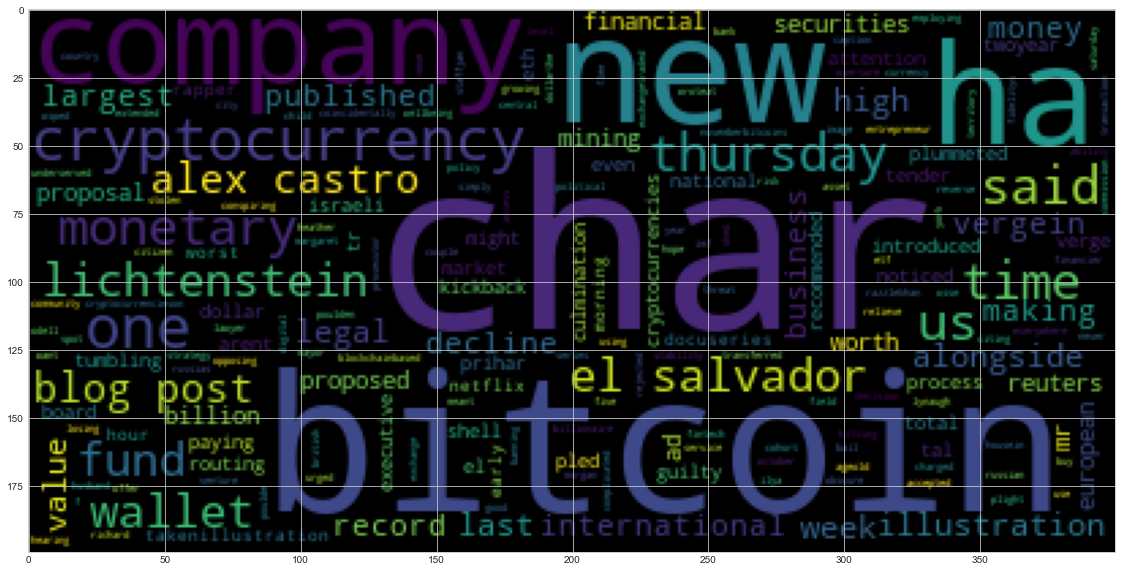

In [47]:
# Generate the Bitcoin word cloud
big_string = ' '.join(btc_df['Article'])
processed = tokenizer(big_string)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

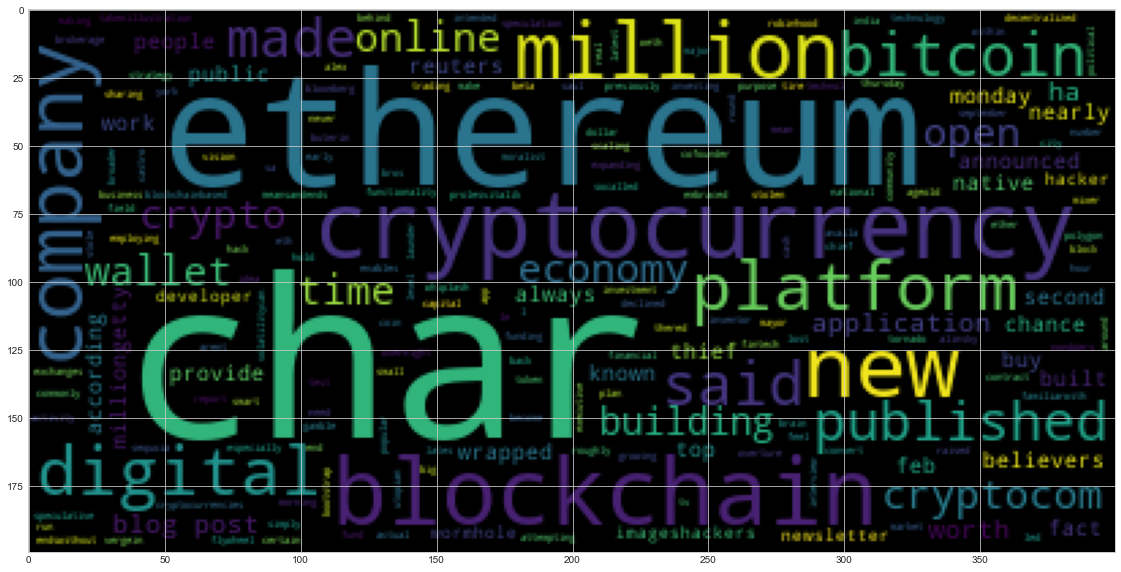

In [48]:
# Generate the Ethereum word cloud
big_string = ' '.join(eth_df['Article'])
processed = tokenizer(big_string)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [50]:
!pip install spacy

In [51]:
import spacy
from spacy import displacy

In [52]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-02-15 19:57:24.765359: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-02-15 19:57:24.765394: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [53]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [54]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(btc_df['Article'])
btc_text

'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars] El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars] Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Alex Castro / The Verge\r\nIn the culmination of a two-year legal process, … [+1448 chars] In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars] Netflix\r\n is making a docuseries about one of the worst rappers of all time\r\n. Coincidentally, Heather "Razzlekhan" Morgan

In [56]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [57]:
# Render the visualization
displacy.render(doc, style='ent')

In [58]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

last week DATE
3 MONEY
El Salvador GPE
US GPE
2021 DATE
Alex Castro PERSON
Verge ORG
The International Monetary Fund’s ORG
El ORG
Israeli NORP
Tal Prihar PERSON
Illustration ORG
Alex Castro PERSON
Verge ORG
two-year DATE
4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
Netflix ORG
about one CARDINAL
Ilya Lichtenstein PERSON
this week DATE
Saturday DATE
more than 50% PERCENT
November DATE
more than $ MONEY
Fintech ORG
New York City GPE
British NORP
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
Russia GPE
Thursday DATE
Russian NORP
the last five years DATE
about 25,000 CARDINAL
Lichtensteins PERSON
Margaret Lynaugh PERSON
Bitcoin PERSON
El Salvador GPE
US GPE
The International Monetary Fund ORG
El Salvador GPE
Reuters ORG
Jan 26 DATE
Reuters ORG
The U.S. Securities and Exchange Commission ORG
Thursday DATE
ETF ORG
Fidelitys Wise Origin Bitcoin ORG
+202 GPE
Sundays Super Bowl ORG
Larry David PERSON
LeBron James PERSO

---

### Ethereum NER

In [59]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(eth_df['Article'])
eth_text

'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars] Hackers who made off with roughly $15 million in ethereum from Crypto.com are attempting to launder the funds through a so-called ethereum mixer, known as Tornado Cash, according to a new report from… [+3891 chars] On some level, the new mayor is simply employing an age-old political strategy: making overtures to the business community. Fintech is a growing field in New York City, and blockchain-based companies… [+1562 chars] Back in September\r\n, Robinhood announced plans to test a cryptocurrency wallet within its app. At the time, the company said it would open the beta to a small number of people before expanding availa… [+1069 chars] If people who buy cryptocurrencies intended only to hold on to them as speculative investments, there\'d be no real need for crypto w

In [60]:
# Run the NER processor on all of the text
doc = nlp(eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [61]:
# Render the visualization
displacy.render(doc, style='ent')

In [62]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
roughly $15 million MONEY
Crypto.com ORG
Tornado Cash PERSON
Fintech ORG
New York City GPE
September DATE
Robinhood ORG
Crypto.com ORG
about $34 million MONEY
Monday DATE
Ethereum ORG
Vitalik Buterin PERSON
Ethereum ORG
Feb 7 DATE
Reuters ORG
Monday DATE
$450 million MONEY
Sequoia Capital India ORG
OPEN ORG
second ORDINAL
OPEN ORG
second ORDINAL
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
120,000 CARDINAL
wEth ORG
Ethereum ORG
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
Bloomberg TV ORG
Crypto.com ORG
Kris Marszalek PERSON
400 CARDINAL
British NORP
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
Feb 4 DATE
Reuters ORG
8.82% PERCENT
40,611.4 MONEY
2202 DATE
Friday DATE
3,291.29 MONEY
Bitcoin PERSON
23.2% PERCENT
TIME ORG
weekly DATE
Vita ORG


---